In [1]:
import sccoda

In [2]:
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt


In [4]:
from sccoda.util import comp_ana as mod


2025-02-10 12:24:50.303304: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-10 12:24:51.469180: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739208291.845822  188350 cuda_dnn.cc:8498] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739208291.946514  188350 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-10 12:24:52.539015: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz
import sccoda.datasets as scd


In [5]:
# Load data
cell_counts = pd.read_csv("/athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/seurat/all.samples.merge.new/new.all.samples.doublet.removed/liger/liger.human.macaque.layer.subclass.for.umap_v2_Nov2024_sampleID2celltype_PFC_mtx_v2.csv")


In [6]:
cell_counts

,Astrocytes,InN_CGE,InN_MGE,L2.3IT_CUX2_CBLN2,L2.3IT_CUX2_RORB,L2.3IT_CUX2_RORB_ACAP3,L2.3IT_ROBO1_CBLN2,L3.5IT_RORB,L5.6NP,L5ET,L6b.L6CT,L6IT_CAR3.L6IT,Microglia,Oligodendrocyte,OPCs,VLMC,sampleID
human_Gan60,1080,434,521,674,5,0,219,482,37,8,49,47,653,2342,237,182,human_Gan60
human_Gan61,1021,295,298,412,2,0,376,716,59,0,348,202,96,435,163,244,human_Gan61
human_Gan62,645,110,296,1,5,0,43,141,37,2,131,29,635,4724,436,14,human_Gan62
human_Gan63,548,165,139,91,1,0,99,80,17,15,44,19,389,1511,178,22,human_Gan63
human_Gan64,235,129,130,47,10,0,3945,24,5,1,33,16,195,1756,173,97,human_Gan64
human_Gan66,812,353,250,394,0,0,347,666,31,0,47,60,307,1833,267,23,human_Gan66
macaque_M1PFC,1068,854,913,814,2,1292,245,886,97,31,183,179,47,409,28,79,macaque_M1PFC
macaque_M2PFC,1264,1778,1460,1964,7,3233,501,1449,72,20,91,143,86,36,61,142,macaque_M2PFC


In [7]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["sampleID"])



In [8]:
# Extract condition from mouse name and add it as an extra column to the covariates
data_all.obs["Condition"] = [x.split('_')[0][:]  for x in data_all.obs["sampleID"]]
print(data_all)

AnnData object with n_obs × n_vars = 8 × 16
    obs: 'sampleID', 'Condition'


In [9]:
data_all.obs

,sampleID,Condition
human_Gan60,human_Gan60,human
human_Gan61,human_Gan61,human
human_Gan62,human_Gan62,human
human_Gan63,human_Gan63,human
human_Gan64,human_Gan64,human
human_Gan66,human_Gan66,human
macaque_M1PFC,macaque_M1PFC,macaque
macaque_M2PFC,macaque_M2PFC,macaque


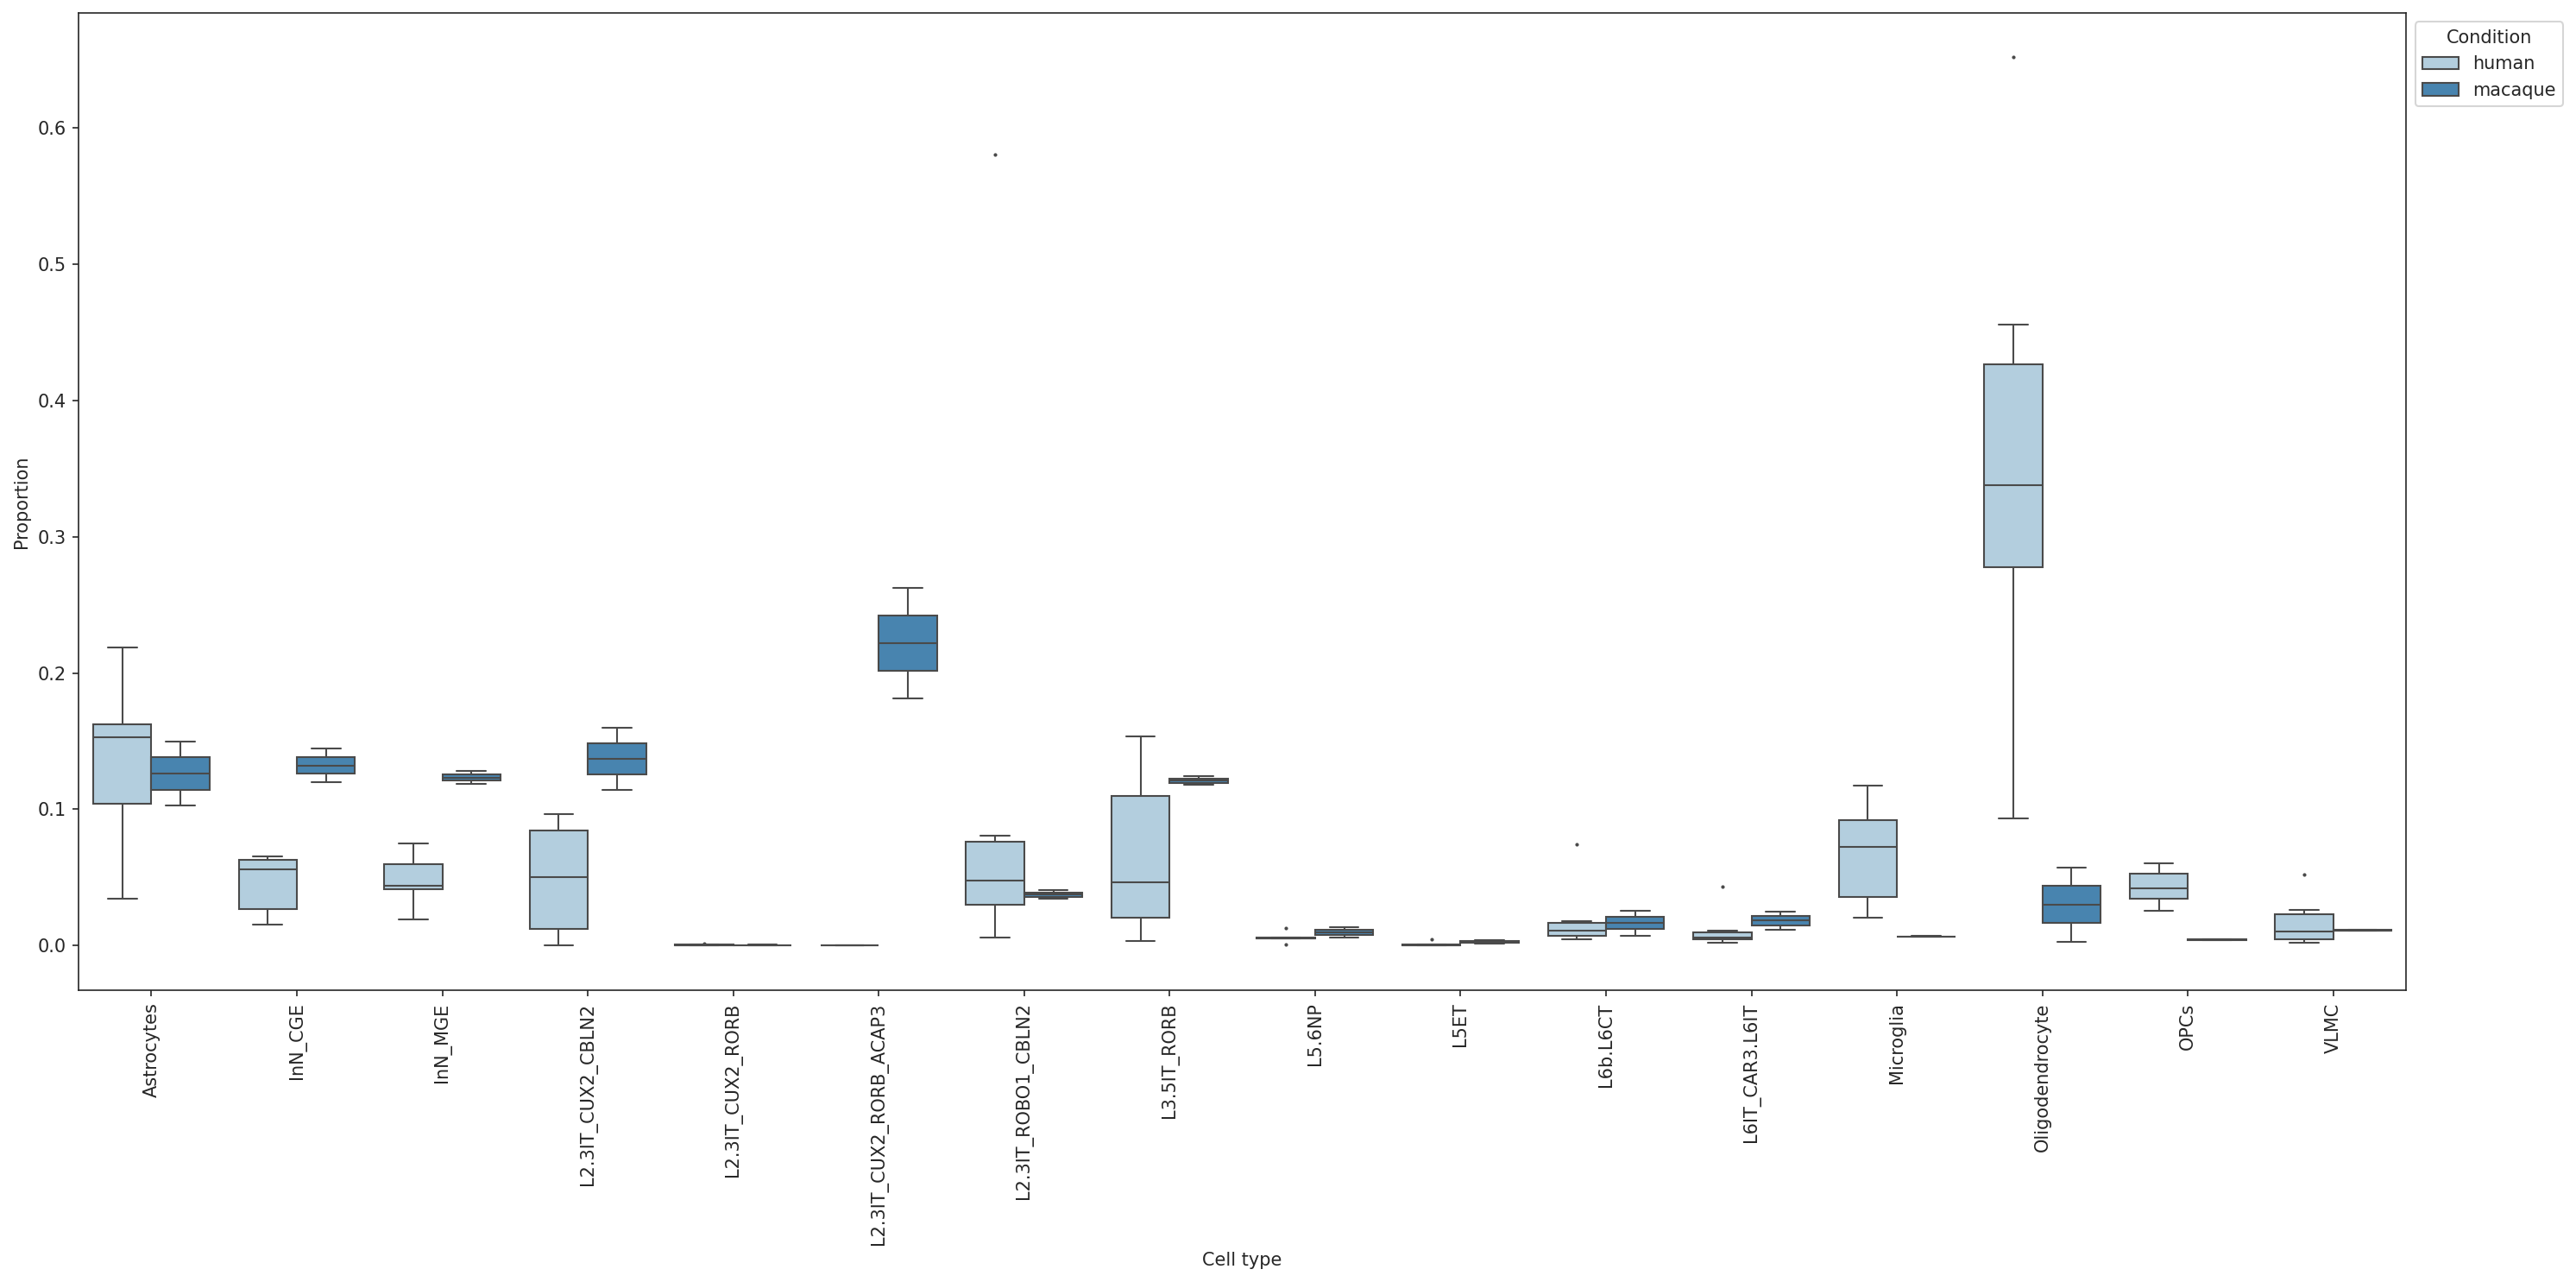

In [10]:
viz.boxplots(data_all, feature_name="Condition", figsize=(20, 10), dpi=150)
plt.show()

<Axes: xlabel='Cell type', ylabel='Proportion'>

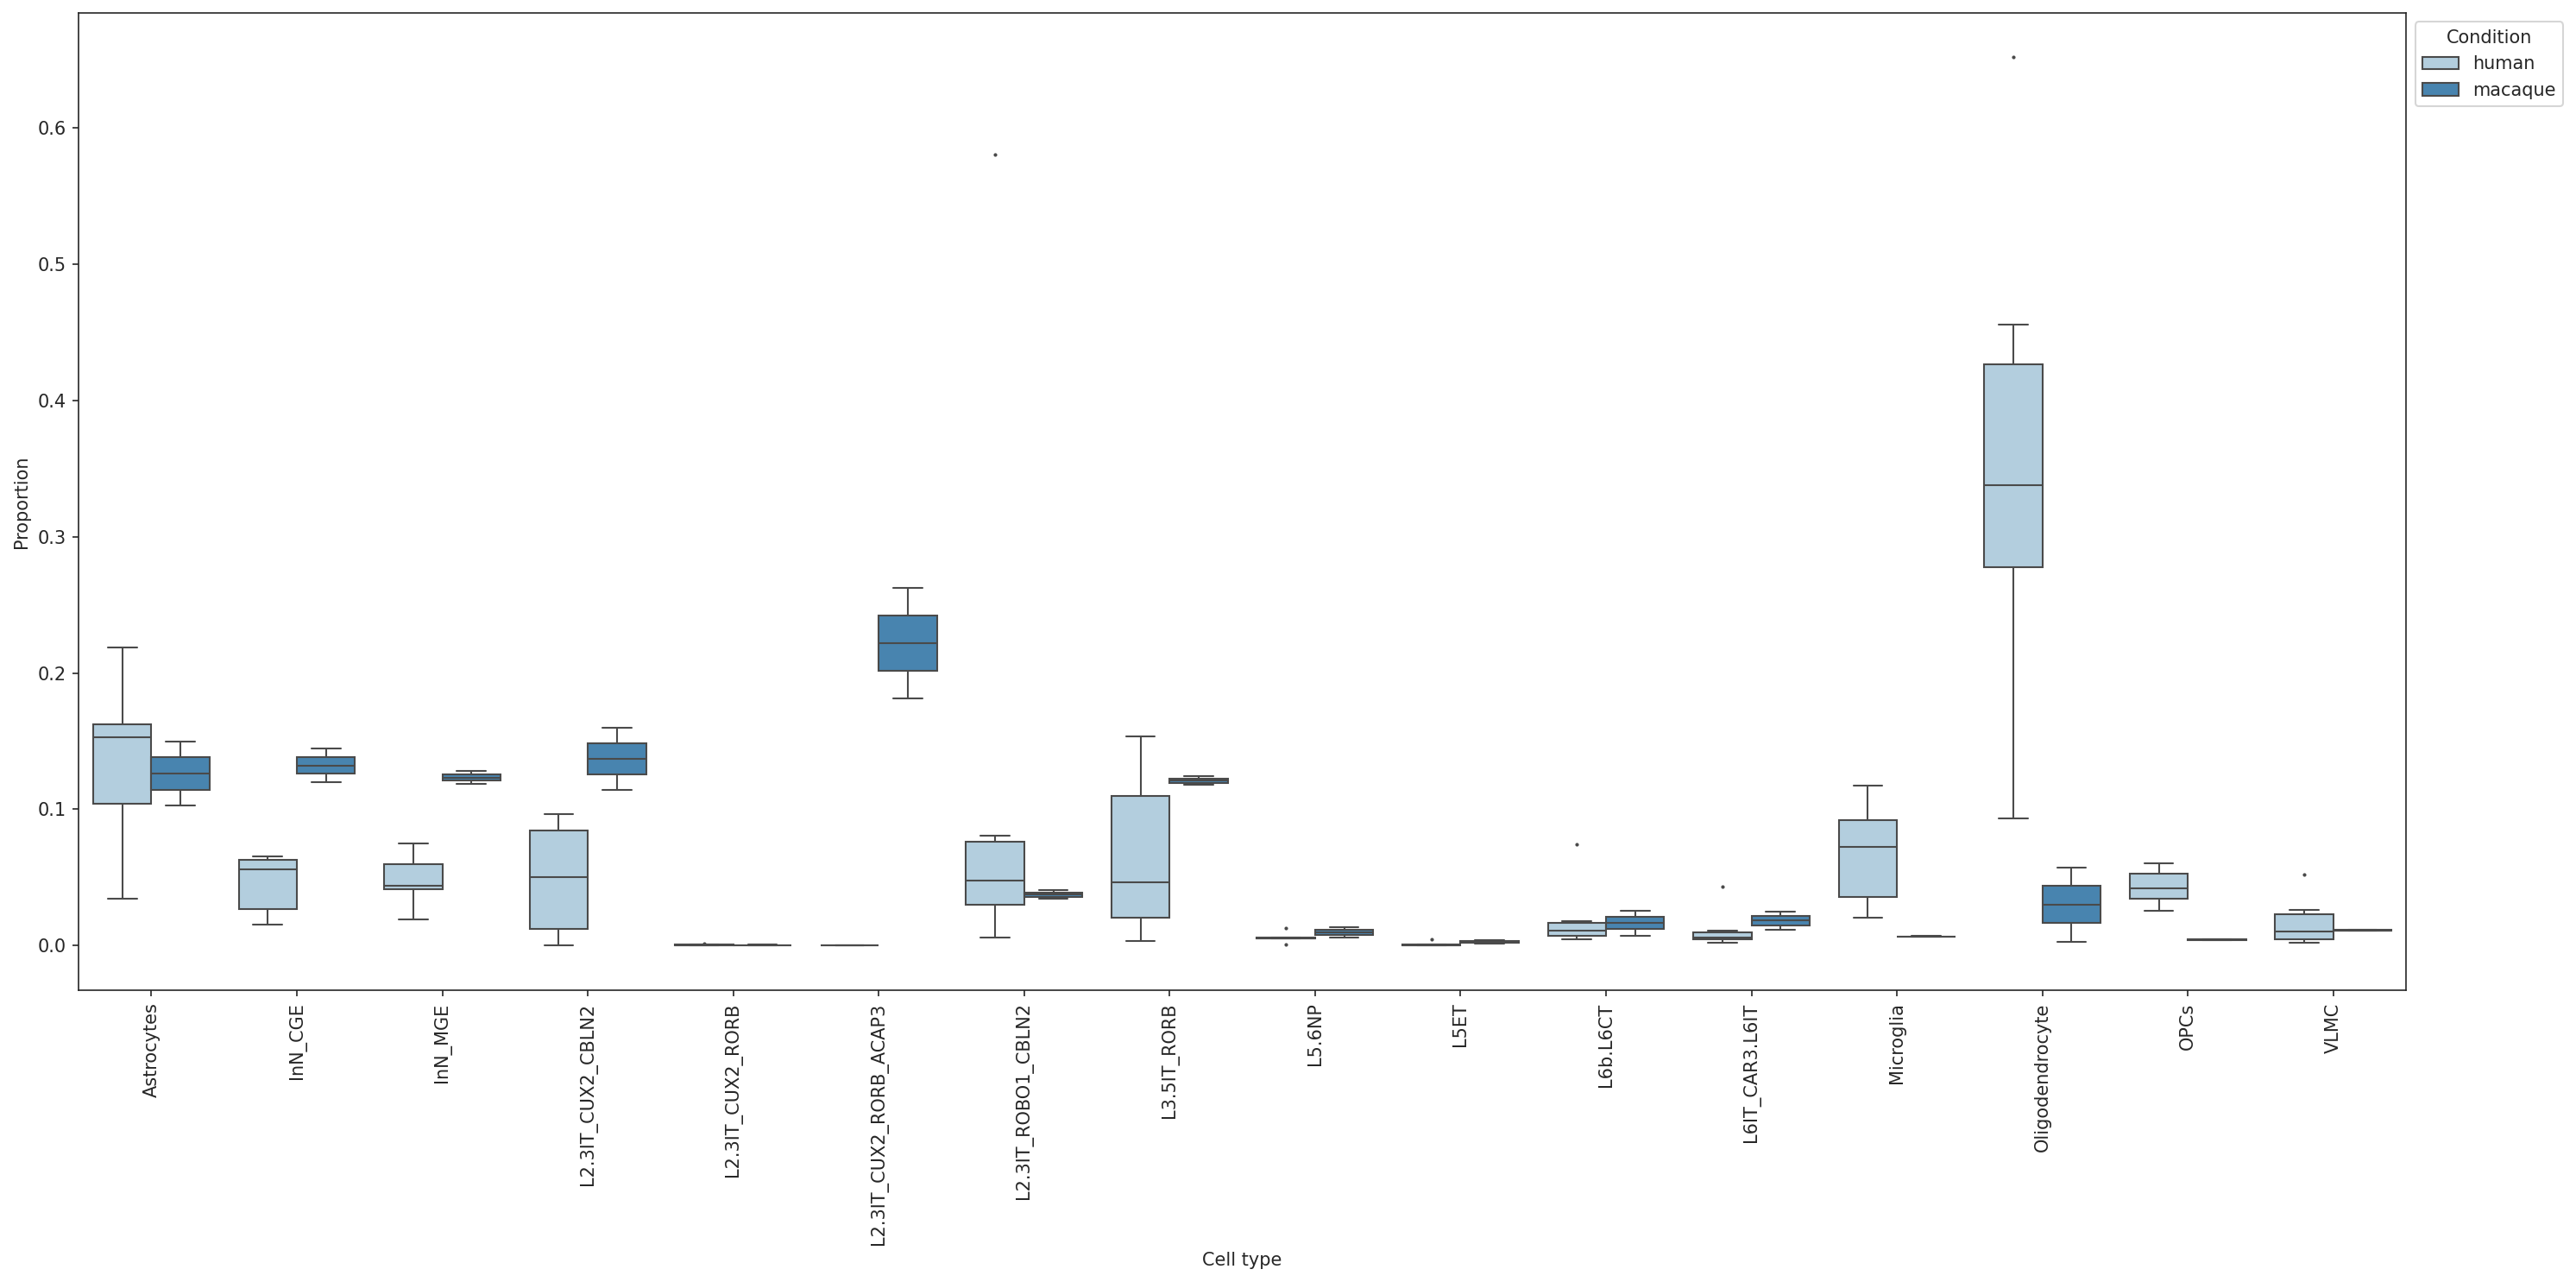

In [24]:
viz.boxplots(data_all, feature_name="Condition", figsize=(20, 10), dpi=150)
plt.savefig('Sccoda_liger.humanVSmacaque.comparison_subclass.celltypes.pdf')
plt.close()

In [31]:
# Stacked barplot for each sample
viz.stacked_barplot(data_all, feature_name="sampleID")
plt.savefig('Sccoda_liger.humanVSmacaque_all.subclass.celltypes_proportion.by.Sample.pdf', dpi=200)
plt.close()

# Stacked barplot for the levels of "Condition"
viz.stacked_barplot(data_all, feature_name="Condition")
plt.savefig('Sccoda_liger.humanVSmacaque_subclass.celltypes_proportion.by.Condition.pdf', dpi=200)
plt.close()

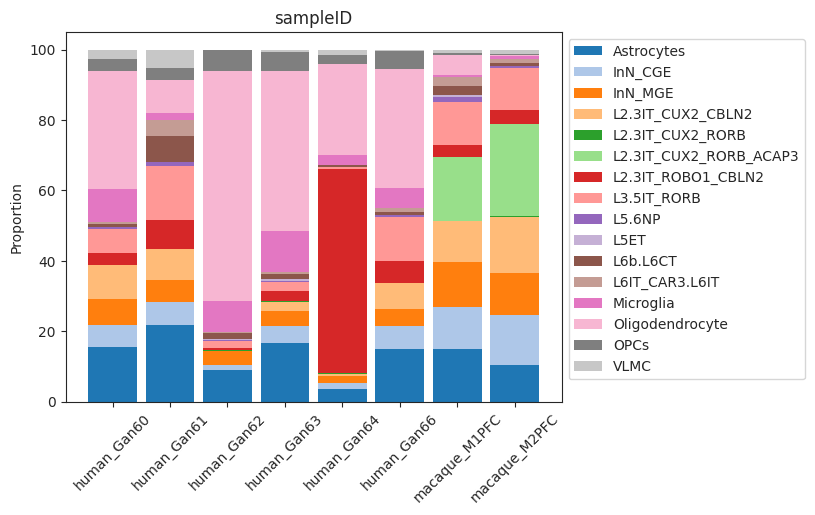

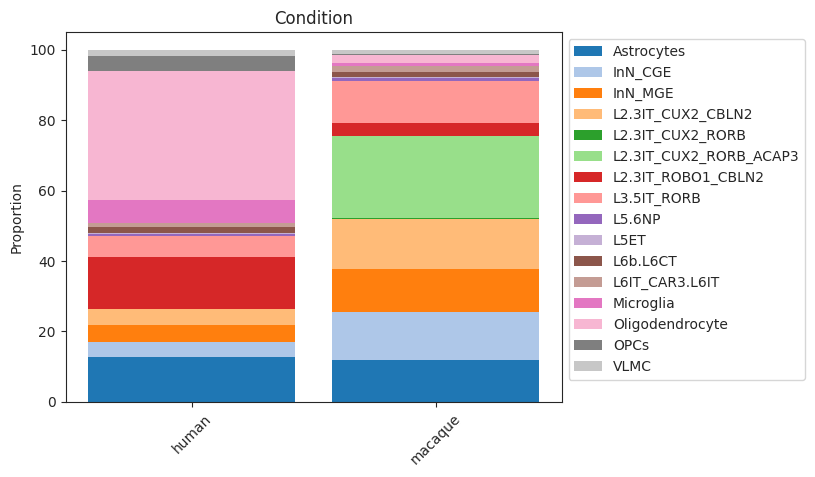

In [26]:
# Stacked barplot for each sample
viz.stacked_barplot(data_all, feature_name="sampleID")
plt.show()

# Stacked barplot for the levels of "Condition"
viz.stacked_barplot(data_all, feature_name="Condition")
plt.show()

In [23]:
pip install ml_dtypes==0.4.0

Note: you may need to restart the kernel to use updated packages.


In [24]:
model_salm = mod.CompositionalAnalysis(data_all, formula="Condition", reference_cell_type="automatic")

Automatic reference selection! Reference cell type set to L5.6NP
Zero counts encountered in data! Added a pseudocount of 0.5.


In [25]:
sim_results = model_salm.sample_hmc()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:17<00:00, 259.52it/s]


MCMC sampling finished. (99.163 sec)
Acceptance rate: 53.7%


In [26]:
sim_results.summary()

Compositional Analysis summary:

Data: 8 samples, 16 cell types
Reference index: 8
Formula: Condition

Intercepts:
                        Final Parameter  Expected Sample
Cell Type                                               
Astrocytes                        1.136       966.331982
InN_CGE                           0.266       404.846281
InN_MGE                           0.365       446.977135
L2.3IT_CUX2_CBLN2                -0.209       251.767852
L2.3IT_CUX2_RORB                 -1.596        62.897564
L2.3IT_CUX2_RORB_ACAP3           -1.707        56.289468
L2.3IT_ROBO1_CBLN2                0.425       474.616658
L3.5IT_RORB                       0.213       383.948121
L5.6NP                           -0.801       139.282945
L5ET                             -1.534        66.920640
L6b.L6CT                         -0.387       210.715196
L6IT_CAR3.L6IT                   -0.551       178.842842
Microglia                         0.344       437.688487
Oligodendrocyte               

In [27]:
print(sim_results.credible_effects())

Covariate             Cell Type             
Condition[T.macaque]  Astrocytes                False
                      InN_CGE                    True
                      InN_MGE                   False
                      L2.3IT_CUX2_CBLN2          True
                      L2.3IT_CUX2_RORB          False
                      L2.3IT_CUX2_RORB_ACAP3     True
                      L2.3IT_ROBO1_CBLN2        False
                      L3.5IT_RORB               False
                      L5.6NP                    False
                      L5ET                      False
                      L6b.L6CT                  False
                      L6IT_CAR3.L6IT            False
                      Microglia                 False
                      Oligodendrocyte            True
                      OPCs                      False
                      VLMC                      False
Name: Final Parameter, dtype: bool


In [37]:
#Adjusting the False discovery rate to 0.05 (conservative cutoff)
sim_results.set_fdr(est_fdr=0.05)
sim_results.summary()

Compositional Analysis summary:

Data: 8 samples, 16 cell types
Reference index: 8
Formula: Condition

Intercepts:
                        Final Parameter  Expected Sample
Cell Type                                               
Astrocytes                        1.136       966.331982
InN_CGE                           0.266       404.846281
InN_MGE                           0.365       446.977135
L2.3IT_CUX2_CBLN2                -0.209       251.767852
L2.3IT_CUX2_RORB                 -1.596        62.897564
L2.3IT_CUX2_RORB_ACAP3           -1.707        56.289468
L2.3IT_ROBO1_CBLN2                0.425       474.616658
L3.5IT_RORB                       0.213       383.948121
L5.6NP                           -0.801       139.282945
L5ET                             -1.534        66.920640
L6b.L6CT                         -0.387       210.715196
L6IT_CAR3.L6IT                   -0.551       178.842842
Microglia                         0.344       437.688487
Oligodendrocyte               

In [38]:
# saving
path = "liger_sccoda.test.automatic.L5.6NP.celltypeRef.fdr0.05"
sim_results.save(path)

In [39]:
## fdr=0.05 cutoff
print(sim_results.credible_effects())

Covariate             Cell Type             
Condition[T.macaque]  Astrocytes                False
                      InN_CGE                    True
                      InN_MGE                   False
                      L2.3IT_CUX2_CBLN2          True
                      L2.3IT_CUX2_RORB          False
                      L2.3IT_CUX2_RORB_ACAP3     True
                      L2.3IT_ROBO1_CBLN2        False
                      L3.5IT_RORB               False
                      L5.6NP                    False
                      L5ET                      False
                      L6b.L6CT                  False
                      L6IT_CAR3.L6IT            False
                      Microglia                 False
                      Oligodendrocyte            True
                      OPCs                      False
                      VLMC                      False
Name: Final Parameter, dtype: bool


In [31]:
#Adjusting the False discovery rate to 0.1 (less conservative cutoff)
sim_results.set_fdr(est_fdr=0.1)
sim_results.summary()

Compositional Analysis summary:

Data: 8 samples, 16 cell types
Reference index: 8
Formula: Condition

Intercepts:
                        Final Parameter  Expected Sample
Cell Type                                               
Astrocytes                        1.136       966.331982
InN_CGE                           0.266       404.846281
InN_MGE                           0.365       446.977135
L2.3IT_CUX2_CBLN2                -0.209       251.767852
L2.3IT_CUX2_RORB                 -1.596        62.897564
L2.3IT_CUX2_RORB_ACAP3           -1.707        56.289468
L2.3IT_ROBO1_CBLN2                0.425       474.616658
L3.5IT_RORB                       0.213       383.948121
L5.6NP                           -0.801       139.282945
L5ET                             -1.534        66.920640
L6b.L6CT                         -0.387       210.715196
L6IT_CAR3.L6IT                   -0.551       178.842842
Microglia                         0.344       437.688487
Oligodendrocyte               

In [32]:
#Adjusting the False discovery rate to 0.1
print(sim_results.credible_effects())


Covariate             Cell Type             
Condition[T.macaque]  Astrocytes                False
                      InN_CGE                    True
                      InN_MGE                    True
                      L2.3IT_CUX2_CBLN2          True
                      L2.3IT_CUX2_RORB          False
                      L2.3IT_CUX2_RORB_ACAP3     True
                      L2.3IT_ROBO1_CBLN2        False
                      L3.5IT_RORB                True
                      L5.6NP                    False
                      L5ET                      False
                      L6b.L6CT                  False
                      L6IT_CAR3.L6IT            False
                      Microglia                 False
                      Oligodendrocyte            True
                      OPCs                      False
                      VLMC                      False
Name: Final Parameter, dtype: bool


In [33]:
#Adjusting the False discovery rate to 0.2 (less conservative cutoff)
sim_results.set_fdr(est_fdr=0.2)
sim_results.summary()

Compositional Analysis summary:

Data: 8 samples, 16 cell types
Reference index: 8
Formula: Condition

Intercepts:
                        Final Parameter  Expected Sample
Cell Type                                               
Astrocytes                        1.136       966.331982
InN_CGE                           0.266       404.846281
InN_MGE                           0.365       446.977135
L2.3IT_CUX2_CBLN2                -0.209       251.767852
L2.3IT_CUX2_RORB                 -1.596        62.897564
L2.3IT_CUX2_RORB_ACAP3           -1.707        56.289468
L2.3IT_ROBO1_CBLN2                0.425       474.616658
L3.5IT_RORB                       0.213       383.948121
L5.6NP                           -0.801       139.282945
L5ET                             -1.534        66.920640
L6b.L6CT                         -0.387       210.715196
L6IT_CAR3.L6IT                   -0.551       178.842842
Microglia                         0.344       437.688487
Oligodendrocyte               

In [35]:
#Adjusting the False discovery rate to 0.2 
print(sim_results.credible_effects())

Covariate             Cell Type             
Condition[T.macaque]  Astrocytes                 True
                      InN_CGE                    True
                      InN_MGE                    True
                      L2.3IT_CUX2_CBLN2          True
                      L2.3IT_CUX2_RORB          False
                      L2.3IT_CUX2_RORB_ACAP3     True
                      L2.3IT_ROBO1_CBLN2        False
                      L3.5IT_RORB                True
                      L5.6NP                    False
                      L5ET                      False
                      L6b.L6CT                  False
                      L6IT_CAR3.L6IT            False
                      Microglia                  True
                      Oligodendrocyte            True
                      OPCs                      False
                      VLMC                      False
Name: Final Parameter, dtype: bool


In [36]:
# saving
path = "liger_sccoda.test.automatic.L5.6NP.celltypeRef.fdr0.2"
sim_results.save(path)


In [40]:
###### change the reference celltype setting
model_VLMC = mod.CompositionalAnalysis(data_all, formula="Condition", reference_cell_type="VLMC")

Zero counts encountered in data! Added a pseudocount of 0.5.


In [41]:
sim_results_VLMC = model_VLMC.sample_hmc()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:18<00:00, 253.50it/s]


MCMC sampling finished. (100.000 sec)
Acceptance rate: 57.3%


In [42]:
#Adjusting the False discovery rate to 0.2 (less conservative cutoff)
sim_results_VLMC.set_fdr(est_fdr=0.2)
sim_results_VLMC.summary()

Compositional Analysis summary:

Data: 8 samples, 16 cell types
Reference index: 15
Formula: Condition

Intercepts:
                        Final Parameter  Expected Sample
Cell Type                                               
Astrocytes                        1.144       958.752751
InN_CGE                           0.294       409.785242
InN_MGE                           0.362       438.619907
L2.3IT_CUX2_CBLN2                -0.230       242.653190
L2.3IT_CUX2_RORB                 -1.544        65.211330
L2.3IT_CUX2_RORB_ACAP3           -1.748        53.177386
L2.3IT_ROBO1_CBLN2                0.445       476.578867
L3.5IT_RORB                       0.240       388.243695
L5.6NP                           -0.802       136.952373
L5ET                             -1.541        65.407257
L6b.L6CT                         -0.356       213.926655
L6IT_CAR3.L6IT                   -0.600       167.608889
Microglia                         0.353       434.690039
Oligodendrocyte              

In [43]:
#Adjusting the False discovery rate to 0.2
print(sim_results.credible_effects())

Covariate             Cell Type             
Condition[T.macaque]  Astrocytes                False
                      InN_CGE                    True
                      InN_MGE                   False
                      L2.3IT_CUX2_CBLN2          True
                      L2.3IT_CUX2_RORB          False
                      L2.3IT_CUX2_RORB_ACAP3     True
                      L2.3IT_ROBO1_CBLN2        False
                      L3.5IT_RORB               False
                      L5.6NP                    False
                      L5ET                      False
                      L6b.L6CT                  False
                      L6IT_CAR3.L6IT            False
                      Microglia                 False
                      Oligodendrocyte            True
                      OPCs                      False
                      VLMC                      False
Name: Final Parameter, dtype: bool


In [44]:
# saving
path = "liger_sccoda.test.RefCelltype.VLMC.celltypeRef.FDR.0.2"
sim_results.save(path)


In [45]:
#Adjusting the False discovery rate to 0.05 (conservative cutoff)
sim_results_VLMC.set_fdr(est_fdr=0.05)
sim_results_VLMC.summary()

Compositional Analysis summary:

Data: 8 samples, 16 cell types
Reference index: 15
Formula: Condition

Intercepts:
                        Final Parameter  Expected Sample
Cell Type                                               
Astrocytes                        1.144       958.752751
InN_CGE                           0.294       409.785242
InN_MGE                           0.362       438.619907
L2.3IT_CUX2_CBLN2                -0.230       242.653190
L2.3IT_CUX2_RORB                 -1.544        65.211330
L2.3IT_CUX2_RORB_ACAP3           -1.748        53.177386
L2.3IT_ROBO1_CBLN2                0.445       476.578867
L3.5IT_RORB                       0.240       388.243695
L5.6NP                           -0.802       136.952373
L5ET                             -1.541        65.407257
L6b.L6CT                         -0.356       213.926655
L6IT_CAR3.L6IT                   -0.600       167.608889
Microglia                         0.353       434.690039
Oligodendrocyte              

In [46]:
#Adjusting the False discovery rate to 0.05
print(sim_results.credible_effects())

Covariate             Cell Type             
Condition[T.macaque]  Astrocytes                False
                      InN_CGE                    True
                      InN_MGE                   False
                      L2.3IT_CUX2_CBLN2          True
                      L2.3IT_CUX2_RORB          False
                      L2.3IT_CUX2_RORB_ACAP3     True
                      L2.3IT_ROBO1_CBLN2        False
                      L3.5IT_RORB               False
                      L5.6NP                    False
                      L5ET                      False
                      L6b.L6CT                  False
                      L6IT_CAR3.L6IT            False
                      Microglia                 False
                      Oligodendrocyte            True
                      OPCs                      False
                      VLMC                      False
Name: Final Parameter, dtype: bool


In [47]:
# saving
path = "liger_sccoda.test.RefCelltype.VLMC.celltypeRef.FDR.0.05"
sim_results.save(path)

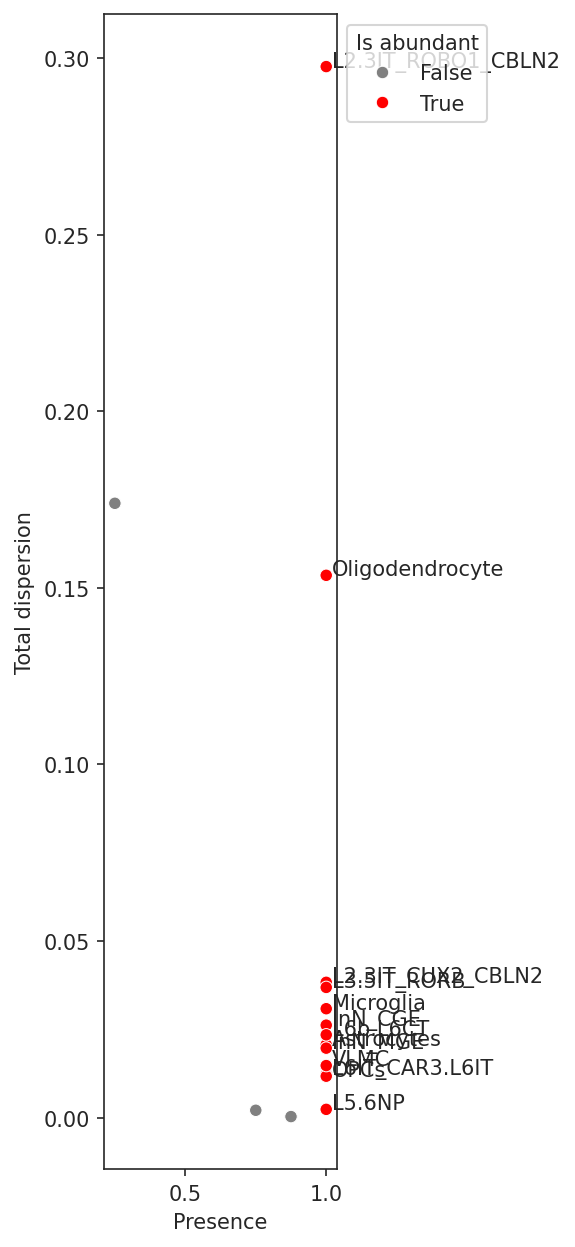

In [54]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9, figsize=(2, 10), dpi=150)
plt.show()

In [56]:
# Run scCODA with each cell type as the reference
cell_types = data_all.var.index
results_cycle = pd.DataFrame(index=cell_types, columns=["times_credible"]).fillna(0)

for ct in cell_types:
    print(f"Reference: {ct}")

    # Run inference
    model_temp = mod.CompositionalAnalysis(data_all, formula="Condition", reference_cell_type=ct)
    temp_results = model_temp.sample_hmc(num_results=20000)

    # Select credible effects
    cred_eff = temp_results.credible_effects()
    cred_eff.index = cred_eff.index.droplevel(level=0)

    # add up credible effects
    results_cycle["times_credible"] += cred_eff.astype("int")


Reference: Astrocytes
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:17<00:00, 258.94it/s]


MCMC sampling finished. (98.812 sec)
Acceptance rate: 46.0%
Reference: InN_CGE
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:16<00:00, 263.12it/s]


MCMC sampling finished. (97.409 sec)
Acceptance rate: 48.4%
Reference: InN_MGE
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:16<00:00, 260.80it/s]


MCMC sampling finished. (98.070 sec)
Acceptance rate: 55.5%
Reference: L2.3IT_CUX2_CBLN2
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:16<00:00, 261.37it/s]


MCMC sampling finished. (97.955 sec)
Acceptance rate: 45.7%
Reference: L2.3IT_CUX2_RORB
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:17<00:00, 258.25it/s]


MCMC sampling finished. (99.205 sec)
Acceptance rate: 50.5%
Reference: L2.3IT_CUX2_RORB_ACAP3
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:17<00:00, 259.02it/s]


MCMC sampling finished. (99.055 sec)
Acceptance rate: 55.6%
Reference: L2.3IT_ROBO1_CBLN2
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:17<00:00, 258.32it/s]


MCMC sampling finished. (99.079 sec)
Acceptance rate: 77.7%
Reference: L3.5IT_RORB
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:18<00:00, 256.39it/s]


MCMC sampling finished. (99.138 sec)
Acceptance rate: 45.2%
Reference: L5.6NP
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:17<00:00, 258.47it/s]


MCMC sampling finished. (99.166 sec)
Acceptance rate: 49.6%
Reference: L5ET
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:17<00:00, 257.20it/s]


MCMC sampling finished. (99.536 sec)
Acceptance rate: 46.6%
Reference: L6b.L6CT
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:17<00:00, 256.92it/s]


MCMC sampling finished. (99.561 sec)
Acceptance rate: 45.4%
Reference: L6IT_CAR3.L6IT
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:17<00:00, 257.70it/s]


MCMC sampling finished. (99.399 sec)
Acceptance rate: 55.5%
Reference: Microglia
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:17<00:00, 258.07it/s]


MCMC sampling finished. (99.214 sec)
Acceptance rate: 43.5%
Reference: Oligodendrocyte
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:18<00:00, 255.94it/s]


MCMC sampling finished. (100.109 sec)
Acceptance rate: 52.4%
Reference: OPCs
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:19<00:00, 252.74it/s]


MCMC sampling finished. (99.955 sec)
Acceptance rate: 39.9%
Reference: VLMC
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:18<00:00, 254.82it/s]


MCMC sampling finished. (99.227 sec)
Acceptance rate: 47.4%


In [57]:
# Calculate percentages
results_cycle["pct_credible"] = results_cycle["times_credible"]/len(cell_types)
results_cycle["is_credible"] = results_cycle["pct_credible"] > 0.5
print(results_cycle)

                        times_credible  pct_credible  is_credible
Astrocytes                           1        0.0625        False
InN_CGE                              6        0.3750        False
InN_MGE                              3        0.1875        False
L2.3IT_CUX2_CBLN2                   14        0.8750         True
L2.3IT_CUX2_RORB                     0        0.0000        False
L2.3IT_CUX2_RORB_ACAP3              15        0.9375         True
L2.3IT_ROBO1_CBLN2                   1        0.0625        False
L3.5IT_RORB                          2        0.1250        False
L5.6NP                               0        0.0000        False
L5ET                                 0        0.0000        False
L6b.L6CT                             0        0.0000        False
L6IT_CAR3.L6IT                       0        0.0000        False
Microglia                            0        0.0000        False
Oligodendrocyte                     15        0.9375         True
OPCs      

In [59]:
results_cycle

,times_credible,pct_credible,is_credible
Astrocytes,1,0.0625,False
InN_CGE,6,0.3750,False
InN_MGE,3,0.1875,False
L2.3IT_CUX2_CBLN2,14,0.8750,True
L2.3IT_CUX2_RORB,0,0.0000,False
L2.3IT_CUX2_RORB_ACAP3,15,0.9375,True
L2.3IT_ROBO1_CBLN2,1,0.0625,False
L3.5IT_RORB,2,0.1250,False
L5.6NP,0,0.0000,False
L5ET,0,0.0000,False


In [58]:
# saving
path = "liger_sccoda.test.cycle.All.Refcelltypes_credible.pct"
sim_results.save(path)

In [61]:
results_cycle.to_csv("liger_sccoda_all.celltypes.cycle_as_Reference_summary.tab",sep='\t',encoding='utf-8', index=True, header=True)